In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(iris['Species'])
iris['Species_label'] = le.transform(iris['Species'])

In [5]:
iris['Species_label'].value_counts()

2    50
1    50
0    50
Name: Species_label, dtype: int64

In [6]:
X=iris.drop(['Id', 'Species', 'Species_label'], axis = 1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Elbow method to find optimal K for k-means++

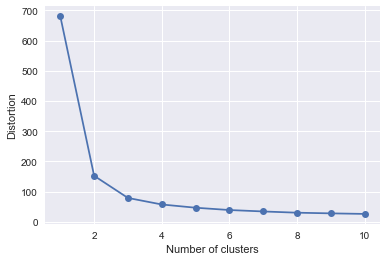

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**From the above graph, we found the elbow is in k = 2 or 3**

### Draw silhouette plot to test K = 2

In [8]:
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples

In [9]:
kmeans = KMeans(n_clusters=2, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

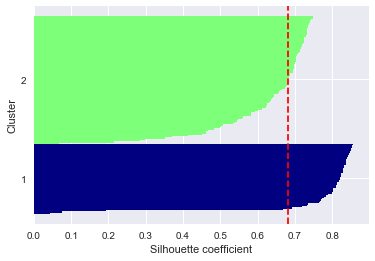

In [10]:
silhouette_vals = silhouette_samples(X, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

### Draw silhouette plot to test K = 3

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

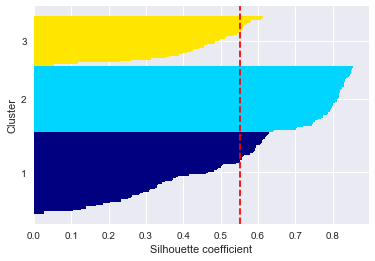

In [12]:
silhouette_vals = silhouette_samples(X, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

#### Based on Silhouette graph, we choose  k = 3

### K-Means++ Cluster Final Result

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
iris["cluster"] = labels

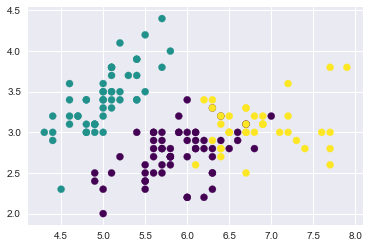

In [14]:
plt.scatter(iris.iloc[:, 1], iris.iloc[:, 2], c= iris["cluster"], s=50, cmap='viridis')

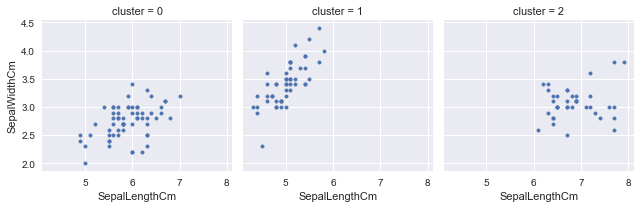

In [15]:
g = sns.FacetGrid(iris, col="cluster")
g = g.map(plt.scatter, "SepalLengthCm", "SepalWidthCm", marker=".")

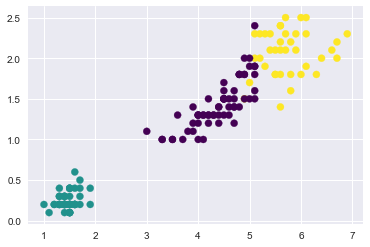

In [16]:
plt.scatter(iris.iloc[:, 3], iris.iloc[:, 4], c= iris["cluster"], s=50, cmap='viridis')

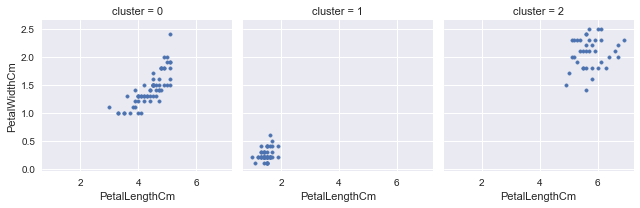

In [17]:
g = sns.FacetGrid(iris, col="cluster")
g = g.map(plt.scatter, "PetalLengthCm", "PetalWidthCm", marker=".")